In [1]:
from __future__ import absolute_import

import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import architectures
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F
import easydict

# Plotting MNIST Knockoff attacks

In [114]:
random_mnist_acc_path = './random-extract/adaptive-model/mnist/MnistNetPate/1-models/random/log_raw_acc_PATE_cost_random.txt'
random_mnist_acc = pd.read_csv(random_mnist_acc_path)

In [115]:
knockoff_mnist_acc_path = './knockoff-extract/adaptive-model/mnist_imagenet/MnistNetPate/1-models/knockoff/log_raw_acc_PATE_cost_knockoff.txt'
knockoff_mnist_acc = pd.read_csv(knockoff_mnist_acc_path)

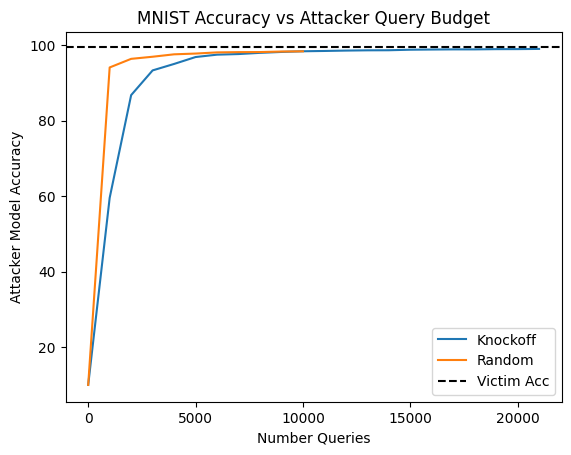

In [116]:
plt.plot(knockoff_mnist_acc['queries'], knockoff_mnist_acc['accuracy'], label='Knockoff')
plt.plot(random_mnist_acc['queries'], random_mnist_acc['accuracy'], label='Random')
plt.axhline(99.39, color='black', linestyle='--', label='Victim Acc')
plt.legend()
plt.title("MNIST Accuracy vs Attacker Query Budget")
plt.xlabel('Number Queries')
plt.ylabel('Attacker Model Accuracy')
plt.savefig('./mnistacc.png', dpi=400)

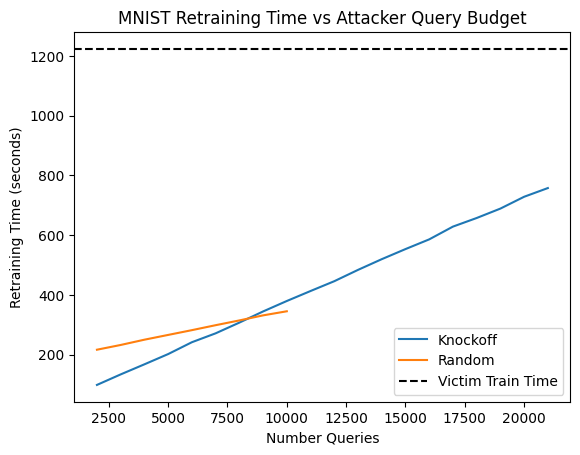

In [118]:
random_mnist_acc_path = './random-extract/adaptive-model/mnist/MnistNetPate/1-models/random/log_raw_time_random.txt'
random_mnist_acc = pd.read_csv(random_mnist_acc_path)

knockoff_mnist_acc_path = './knockoff-extract/adaptive-model/mnist_imagenet/MnistNetPate/1-models/knockoff/log_raw_time_knockoff.txt' 

knockoff_mnist_acc = pd.read_csv(knockoff_mnist_acc_path)

plt.plot(knockoff_mnist_acc.iloc[:, 0], knockoff_mnist_acc.iloc[:, 3], label='Knockoff')
plt.plot(random_mnist_acc.iloc[:, 0], random_mnist_acc.iloc[:, 3], label='Random')
plt.axhline(1223.6087975502014, color='black', linestyle='--', label='Victim Train Time')
plt.legend()
plt.title("MNIST Retraining Time vs Attacker Query Budget")
plt.xlabel('Number Queries')
plt.ylabel('Retraining Time (seconds)')
plt.savefig('./mnisttime.png', dpi=400)

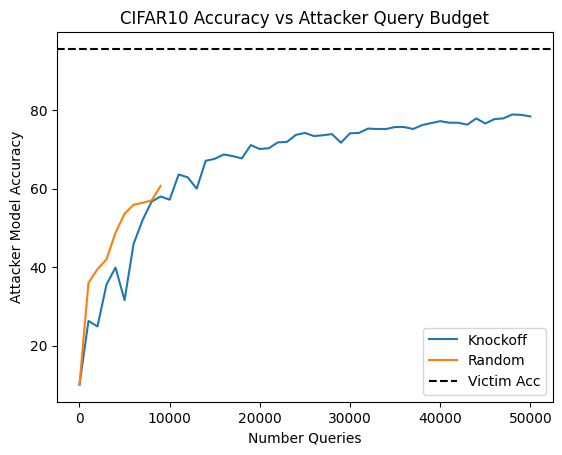

In [119]:
cifar_acc_path = './random-extract/adaptive-model/cifar10/ResNet34/1-models/random/log_raw_acc_PATE_cost_random.txt'
random_cifar_acc = pd.read_csv(cifar_acc_path)

knockoff_cifar_acc_path = './knockoff-extract/adaptive-model/cifar10_cifar100/ResNet34/1-models/knockoff/log_raw_acc_PATE_cost_knockoff.txt' 

knockoff_cifar_acc = pd.read_csv(knockoff_cifar_acc_path)

plt.plot(knockoff_cifar_acc['queries'], knockoff_cifar_acc['accuracy'], label='Knockoff')
plt.plot(random_cifar_acc['queries'], random_cifar_acc['accuracy'], label='Random')
plt.axhline(95.6, color='black', linestyle='--', label='Victim Acc')
plt.legend()
plt.title("CIFAR10 Accuracy vs Attacker Query Budget")
plt.xlabel('Number Queries')
plt.ylabel('Attacker Model Accuracy')
plt.savefig('./caifaracc.png', dpi=400)

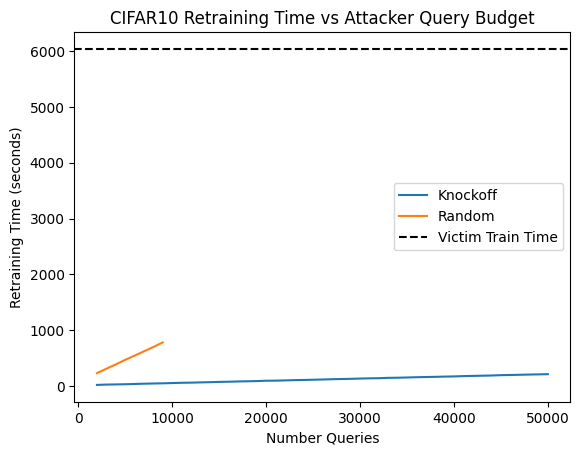

In [120]:
cifar_acc_path = './random-extract/adaptive-model/cifar10/ResNet34/1-models/random/log_raw_time_random.txt'
random_cifar_acc = pd.read_csv(cifar_acc_path)

knockoff_cifar_acc_path = './knockoff-extract/adaptive-model/cifar10_cifar100/ResNet34/1-models/knockoff/log_raw_time_knockoff.txt' 

knockoff_cifar_acc = pd.read_csv(knockoff_cifar_acc_path)

plt.plot(knockoff_cifar_acc.iloc[:, 0], knockoff_cifar_acc.iloc[:, 3], label='Knockoff')
plt.plot(random_cifar_acc.iloc[:, 0], random_cifar_acc.iloc[:, 3], label='Random')
plt.axhline(6038.865751743317, color='black', linestyle='--', label='Victim Train Time')
plt.legend()
plt.title("CIFAR10 Retraining Time vs Attacker Query Budget")
plt.xlabel('Number Queries')
plt.ylabel('Retraining Time (seconds)')
plt.savefig('./cifartime.png', dpi=400)

## Loading MNIST models and seeing differences.

In [107]:
# MNIST victim
rand_victim = './random-extract/private-models/mnist/MnistNetPate/1-models/checkpoint-model(1).pth.tar'
rchpt = torch.load(rand_victim)
device = torch.device("cuda")
rvic_model = architectures.mnist_net_pate.MnistNetPate('model(1)', [])
rvic_model.load_state_dict(rchpt['state_dict'])
rvic_model.eval()

# MNIST knockoff
knockoff_stolen = './knockoff-extract/adaptive-model/mnist_imagenet/MnistNetPate/1-models/knockoff/checkpoint.pth.tar'
chpt = torch.load(knockoff_stolen)
knock_model = architectures.mnist_net_pate.MnistNetPate('knockoff', [])
knock_model.load_state_dict(chpt['state_dict'])
knock_model.eval()

# MNIST random
rand_stolen = './random-extract/adaptive-model/mnist/MnistNetPate/1-models/random/checkpoint.pth.tar'
rschpt = torch.load(rand_stolen)
keys = list(rschpt['state_dict'].keys())
for key in keys:
    new_key = '.'.join(key.split('.')[1:])
    rschpt['state_dict'][new_key] = rschpt['state_dict'][key]
    del rschpt['state_dict'][key]
rand_model = architectures.mnist_net_pate.MnistNetPate('random', [])
rand_model.load_state_dict(rschpt['state_dict'])
rand_model.eval()

MnistNetPate(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [110]:
# cifar Victim
rand_victim = './random-extract/private-models/cifar10/ResNet34/1-models/checkpoint-model(1).pth.tar'
rchpt = torch.load(rand_victim)
rvic_model = architectures.resnet.ResNet34('model(1)', [])
rvic_model.load_state_dict(rchpt['state_dict'])
rvic_model.eval()

# cifar knockoff
knockoff_stolen = './knockoff-extract/adaptive-model/cifar10_cifar100/ResNet34/1-models/knockoff/checkpoint.pth.tar'
chpt = torch.load(knockoff_stolen)
knock_model = architectures.resnet.ResNet18('model(1)', None)
knock_model.load_state_dict(chpt['state_dict'])
knock_model.eval()

# cifar random
rand_stolen = './random-extract/adaptive-model/cifar10/ResNet34/1-models/random/checkpoint.pth.tar'
rschpt = torch.load(rand_stolen)
keys = list(rschpt['state_dict'].keys())
for key in keys:
    new_key = '.'.join(key.split('.')[1:])
    rschpt['state_dict'][new_key] = rschpt['state_dict'][key]
    del rschpt['state_dict'][key]
rand_model = architectures.resnet.ResNet34('random', None)
rand_model.load_state_dict(rschpt['state_dict'])
rand_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [108]:
# MNIST transforms
transformations = []
transformations.append(transforms.ToTensor())
transformations.append(
transforms.Normalize((0.13251461,), (0.31048025,)))
transformations = transforms.Compose(transformations)

mnist_dataset = datasets.MNIST(
        root='/mfsnic/datasets/MNIST',
        train=False,
        transform=transformations,
        download=False)

mnist_test_loader = torch.utils.data.DataLoader(mnist_dataset, 
                              batch_size=100, 
                              shuffle=True, 
                              num_workers=1)

In [111]:
# CIFAR transforms
normalize = transforms.Normalize(
        mean=[0.49139969,
        0.48215842,
        0.44653093],
        std=[0.24703223,
        0.24348513,
        0.26158784])
preprocessing = [
    transforms.Pad(4),
    transforms.RandomCrop(32),
    transforms.RandomHorizontalFlip(),transforms.ToTensor(),normalize
]
transformations = transforms.Compose(preprocessing)

cifar_dataset = datasets.CIFAR10(
        root='/mfsnic/datasets/CIFAR10',
        train=False,
        transform=transformations,
        download=False)

mnist_test_loader = torch.utils.data.DataLoader(cifar_dataset,
                                batch_size=100,
                                shuffle=True,
                                num_workers=1)

In [61]:
from scipy.stats import wasserstein_distance
from scipy.stats import entropy

## Some relatively interesing stats 

In [112]:
test_losses = []
test_losses2 = []
test_losses3 = []
test_loss = 0
test_loss2 = 0
test_loss3 = 0
correct = 0
correct2 = 0
correct3 = 0
wasses_12 = []
entrs_12 = []
wasses_13 = []
entrs_13 = []
wasses_23 = []
entrs_23 = []
with torch.no_grad():
    for batch_idx, (test_data, test_targets) in enumerate(mnist_test_loader):
        output = rvic_model(test_data)
        output2 = knock_model(test_data)
        output3 = rand_model(test_data)
        for i in range(output.numpy().shape[0]):
            wass = wasserstein_distance(output.numpy()[i,:], output2.numpy()[i, :])
            wasses_12.append(wass)
            entr = entropy(abs(output2.numpy()[i, :]), abs(output.numpy()[i,:]))
            entrs_12.append(entr)
            
            wass = wasserstein_distance(output.numpy()[i,:], output3.numpy()[i, :])
            wasses_13.append(wass)
            entr = entropy(abs(output3.numpy()[i, :]), abs(output.numpy()[i,:]))
            entrs_13.append(entr)
            
            wass = wasserstein_distance(output2.numpy()[i,:], output3.numpy()[i, :])
            wasses_23.append(wass)
            entr = entropy(abs(output3.numpy()[i, :]), abs(output2.numpy()[i,:]))
            entrs_23.append(entr)
        test_loss += F.cross_entropy(output, test_targets, size_average=False).item()
        test_loss2 += F.cross_entropy(output2, test_targets, size_average=False).item()
        test_loss3 += F.cross_entropy(output3, test_targets, size_average=False).item()

        pred = output.data.max(1, keepdim=True)[1]
        pred2 = output2.data.max(1, keepdim=True)[1]
        pred3 = output3.data.max(1, keepdim=True)[1]
        correct += pred.eq(test_targets.data.view_as(pred)).sum()
        correct2 += pred2.eq(test_targets.data.view_as(pred2)).sum()
        correct3 += pred3.eq(test_targets.data.view_as(pred3)).sum()


    test_loss /= len(mnist_test_loader.dataset)
    test_loss2 /= len(mnist_test_loader.dataset)
    test_loss3 /= len(mnist_test_loader.dataset)

    test_losses.append(test_loss)
    test_losses2.append(test_loss2)
    test_losses3.append(test_loss3)
    print('\nVictim Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
                                test_loss, correct, len(mnist_test_loader.dataset),
                                100. * correct / len(mnist_test_loader.dataset)))
    print('\nKnockoff Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
                                test_loss2, correct2, len(mnist_test_loader.dataset),
                                100. * correct2 / len(mnist_test_loader.dataset)))
    print('\Random Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(
                                test_loss3, correct3, len(mnist_test_loader.dataset),
                                100. * correct3 / len(mnist_test_loader.dataset)))
    print('Mean wasserstein distance victim knockoff: {} +- {}'.format(np.mean(wasses_12), np.std(wasses_12)))
    print('Mean KL victim knockoff: {} +- {}'.format(np.mean(entrs_12), np.std(entrs_12)))
    
    print('Mean wasserstein distance victim random: {} +- {}'.format(np.mean(wasses_13), np.std(wasses_13)))
    print('Mean KL victim random: {} +- {}'.format(np.mean(entrs_13), np.std(entrs_13)))
    
    print('Mean wasserstein distance random knockoff: {} +- {}'.format(np.mean(wasses_23), np.std(wasses_23)))
    print('Mean KL random knockoff: {} +- {}'.format(np.mean(entrs_23), np.std(entrs_23)))


Victim Test set: Avg. loss: 0.3400, Accuracy: 9089/10000 (90.8900%)


Knockoff Test set: Avg. loss: 0.7445, Accuracy: 7537/10000 (75.3700%)

\Random Test set: Avg. loss: 3.2478, Accuracy: 5055/10000 (50.5500%)

Mean wasserstein distance victim knockoff: 1.6022796611165069 +- 0.568396517670052
Mean KL victim knockoff: 0.42974379658699036 +- 0.25327354669570923
Mean wasserstein distance victim random: 2.2146536897816325 +- 0.8966220340153703
Mean KL victim random: 0.5608322024345398 +- 0.3228326439857483
Mean wasserstein distance random knockoff: 2.3939240189817914 +- 1.0609971659602362
Mean KL random knockoff: 0.48814868927001953 +- 0.2922075688838959


## Mnist stolen by imagenet data
Imagenet trained network classify MNIST samples

Attacker will do whatever cheapest to get knowledge of MNIST.

If attacker already has Imagenet classifier, why should they steal MNIST? Show imagenet is bad at classifying MNIST.
Or could they cheaply finetune (would already know MNIST dataset but not trained on it yet)? Or is it cheapest to steal? 

Challenge: difference between input and output dims. 

See Image Classification of MNIST dataset using VGG-16

Input dim fixed by padding MNIST digit to imagenet input size, duplicating over channels. 
Output dim/classes, change last layer, only train this layer to finetune. 